In [ ]:
!pip install peewee

     |████████████████████████████████| 855 kB 4.0 MB/s 
  Created wheel for peewee: filename=peewee-3.14.10-cp37-cp37m-linux_x86_64.whl size=616205 sha256=f84bc37df426c9bebdaa7a9c3a2511f3fc75d6139c836cc006c068ae4811f236
  Stored in directory: /root/.cache/pip/wheels/df/4f/73/3228affbec8e2e73e622306ac47ebba39df2170bd784eec69c
Successfully built peewee


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import peewee

db_features_one = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_one.db")
db_features_two = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_two.db")
db_features_three = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_three.db")


class ExtractedFeaturesOne(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_one
        legacy_table_names = False


class ExtractedFeaturesTwo(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_two
        legacy_table_names = False


class ExtractedFeaturesThree(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_three
        legacy_table_names = False


db_features_one.create_tables(
    [
        ExtractedFeaturesOne,
        ExtractedFeaturesTwo,
        ExtractedFeaturesThree
    ]
)


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
from tqdm import tqdm, trange
from imblearn.over_sampling import SMOTE
import json


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [ ]:
pipe = Pipeline([('smote', SMOTE()), ('scaler', StandardScaler()), ('svc', LinearSVC())])

In [ ]:
f = open("/content/drive/MyDrive/diss_data/suspicious_network_two.json")
sus_raw = json.load(f)
sus = [int(sus) for sus in sus_raw]
f.close()


In [ ]:
len(sus)


28

In [ ]:
def get_data(query, X, y):
  for feature in tqdm(query):
    X.append(json.loads(feature.feature_array.decode('utf-8')))
    y.append(feature.user_id)


In [ ]:
train_X = []
train_y = []

In [ ]:
query = ExtractedFeaturesOne.select().where((ExtractedFeaturesOne.data_split_type == 0) & (ExtractedFeaturesOne.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 652/652 [00:00<00:00, 16851.45it/s]


In [ ]:
query = ExtractedFeaturesTwo.select().where((ExtractedFeaturesTwo.data_split_type == 0) & (ExtractedFeaturesTwo.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 1450/1450 [00:00<00:00, 28089.11it/s]


In [ ]:
query = ExtractedFeaturesThree.select().where((ExtractedFeaturesThree.data_split_type == 0) & (ExtractedFeaturesThree.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 829/829 [00:00<00:00, 22842.45it/s]


In [ ]:
(len(train_y) / 1873093) * 100

0.15647914972721588

In [ ]:
len(train_y) / len(sus)

104.67857142857143

In [ ]:
for thing in train_y:
    if thing not in sus:
        raise Exception("borked")


In [ ]:
pipe.fit(train_X, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('smote', SMOTE()), ('scaler', StandardScaler()),
                ('svc', LinearSVC())])

In [ ]:
import pickle

filehandler = open("pipe_network_two.obj","wb")
pickle.dump(pipe, filehandler)
filehandler.close()


In [ ]:
test_X = []
test_y = []

In [ ]:
query = ExtractedFeaturesOne.select().where((ExtractedFeaturesOne.data_split_type == 1) & (ExtractedFeaturesOne.user_id << sus))
get_data(query, test_X, test_y)


100%|██████████| 285/285 [00:00<00:00, 23517.61it/s]


In [ ]:
query = ExtractedFeaturesTwo.select().where((ExtractedFeaturesTwo.data_split_type == 1) & (ExtractedFeaturesTwo.user_id << sus))
get_data(query, test_X, test_y)


100%|██████████| 628/628 [00:00<00:00, 28028.97it/s]


In [ ]:
query = ExtractedFeaturesThree.select().where((ExtractedFeaturesThree.data_split_type == 1) & (ExtractedFeaturesThree.user_id << sus))
get_data(query, test_X, test_y)


100%|██████████| 359/359 [00:00<00:00, 24491.79it/s]


In [ ]:
pipe.score(test_X, test_y)

0.30974842767295596

In [ ]:
y_predicted = pipe.predict(test_X)

In [ ]:
!pip install pycm

     |████████████████████████████████| 66 kB 2.4 MB/s 
     |████████████████████████████████| 590 kB 9.2 MB/s 


In [ ]:
from pycm import *
cm = ConfusionMatrix(actual_vector=test_y, predict_vector=y_predicted)

In [ ]:
cm.save_html("out")

{'Message': '/content/out.html', 'Status': True}

In [ ]:
cm.save_stat("out")

{'Message': '/content/out.pycm', 'Status': True}

In [ ]:
cm.save_csv("out")

{'Message': '/content/out.csv', 'Status': True}

In [ ]:
cm.save_report("out")

AttributeError: ignored

In [ ]:
cm.save_obj("cm")

{'Message': '/content/cm.obj', 'Status': True}

In [ ]:
!zip out_all.zip out* pipe*

  adding: out.csv (deflated 63%)
  adding: out.html (deflated 95%)
  adding: out_matrix.csv (deflated 73%)
  adding: out.pycm (deflated 83%)
  adding: pipe_network_two.obj (deflated 52%)


In [ ]:
from google.colab import files
files.download('out_all.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(cm)

Predict     2395        5517        6439        7187        7399        9051        12062       13348       14311       15095       15164       15654       15918       19272       19838       22502       22586       23772       24660       24937       27814       29315       36913       37457       49687       49735       58858       65363       
Actual
2395        9           0           0           0           1           1           0           4           2           3           0           1           1           2           1           0           0           3           1           1           0           0           0           1           1           1           0           0           

5517        4           11          2           0           3           0           2           4           1           1           0           3           1           1           3           1           1           2           1           4           2           4           2           3     

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:206: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


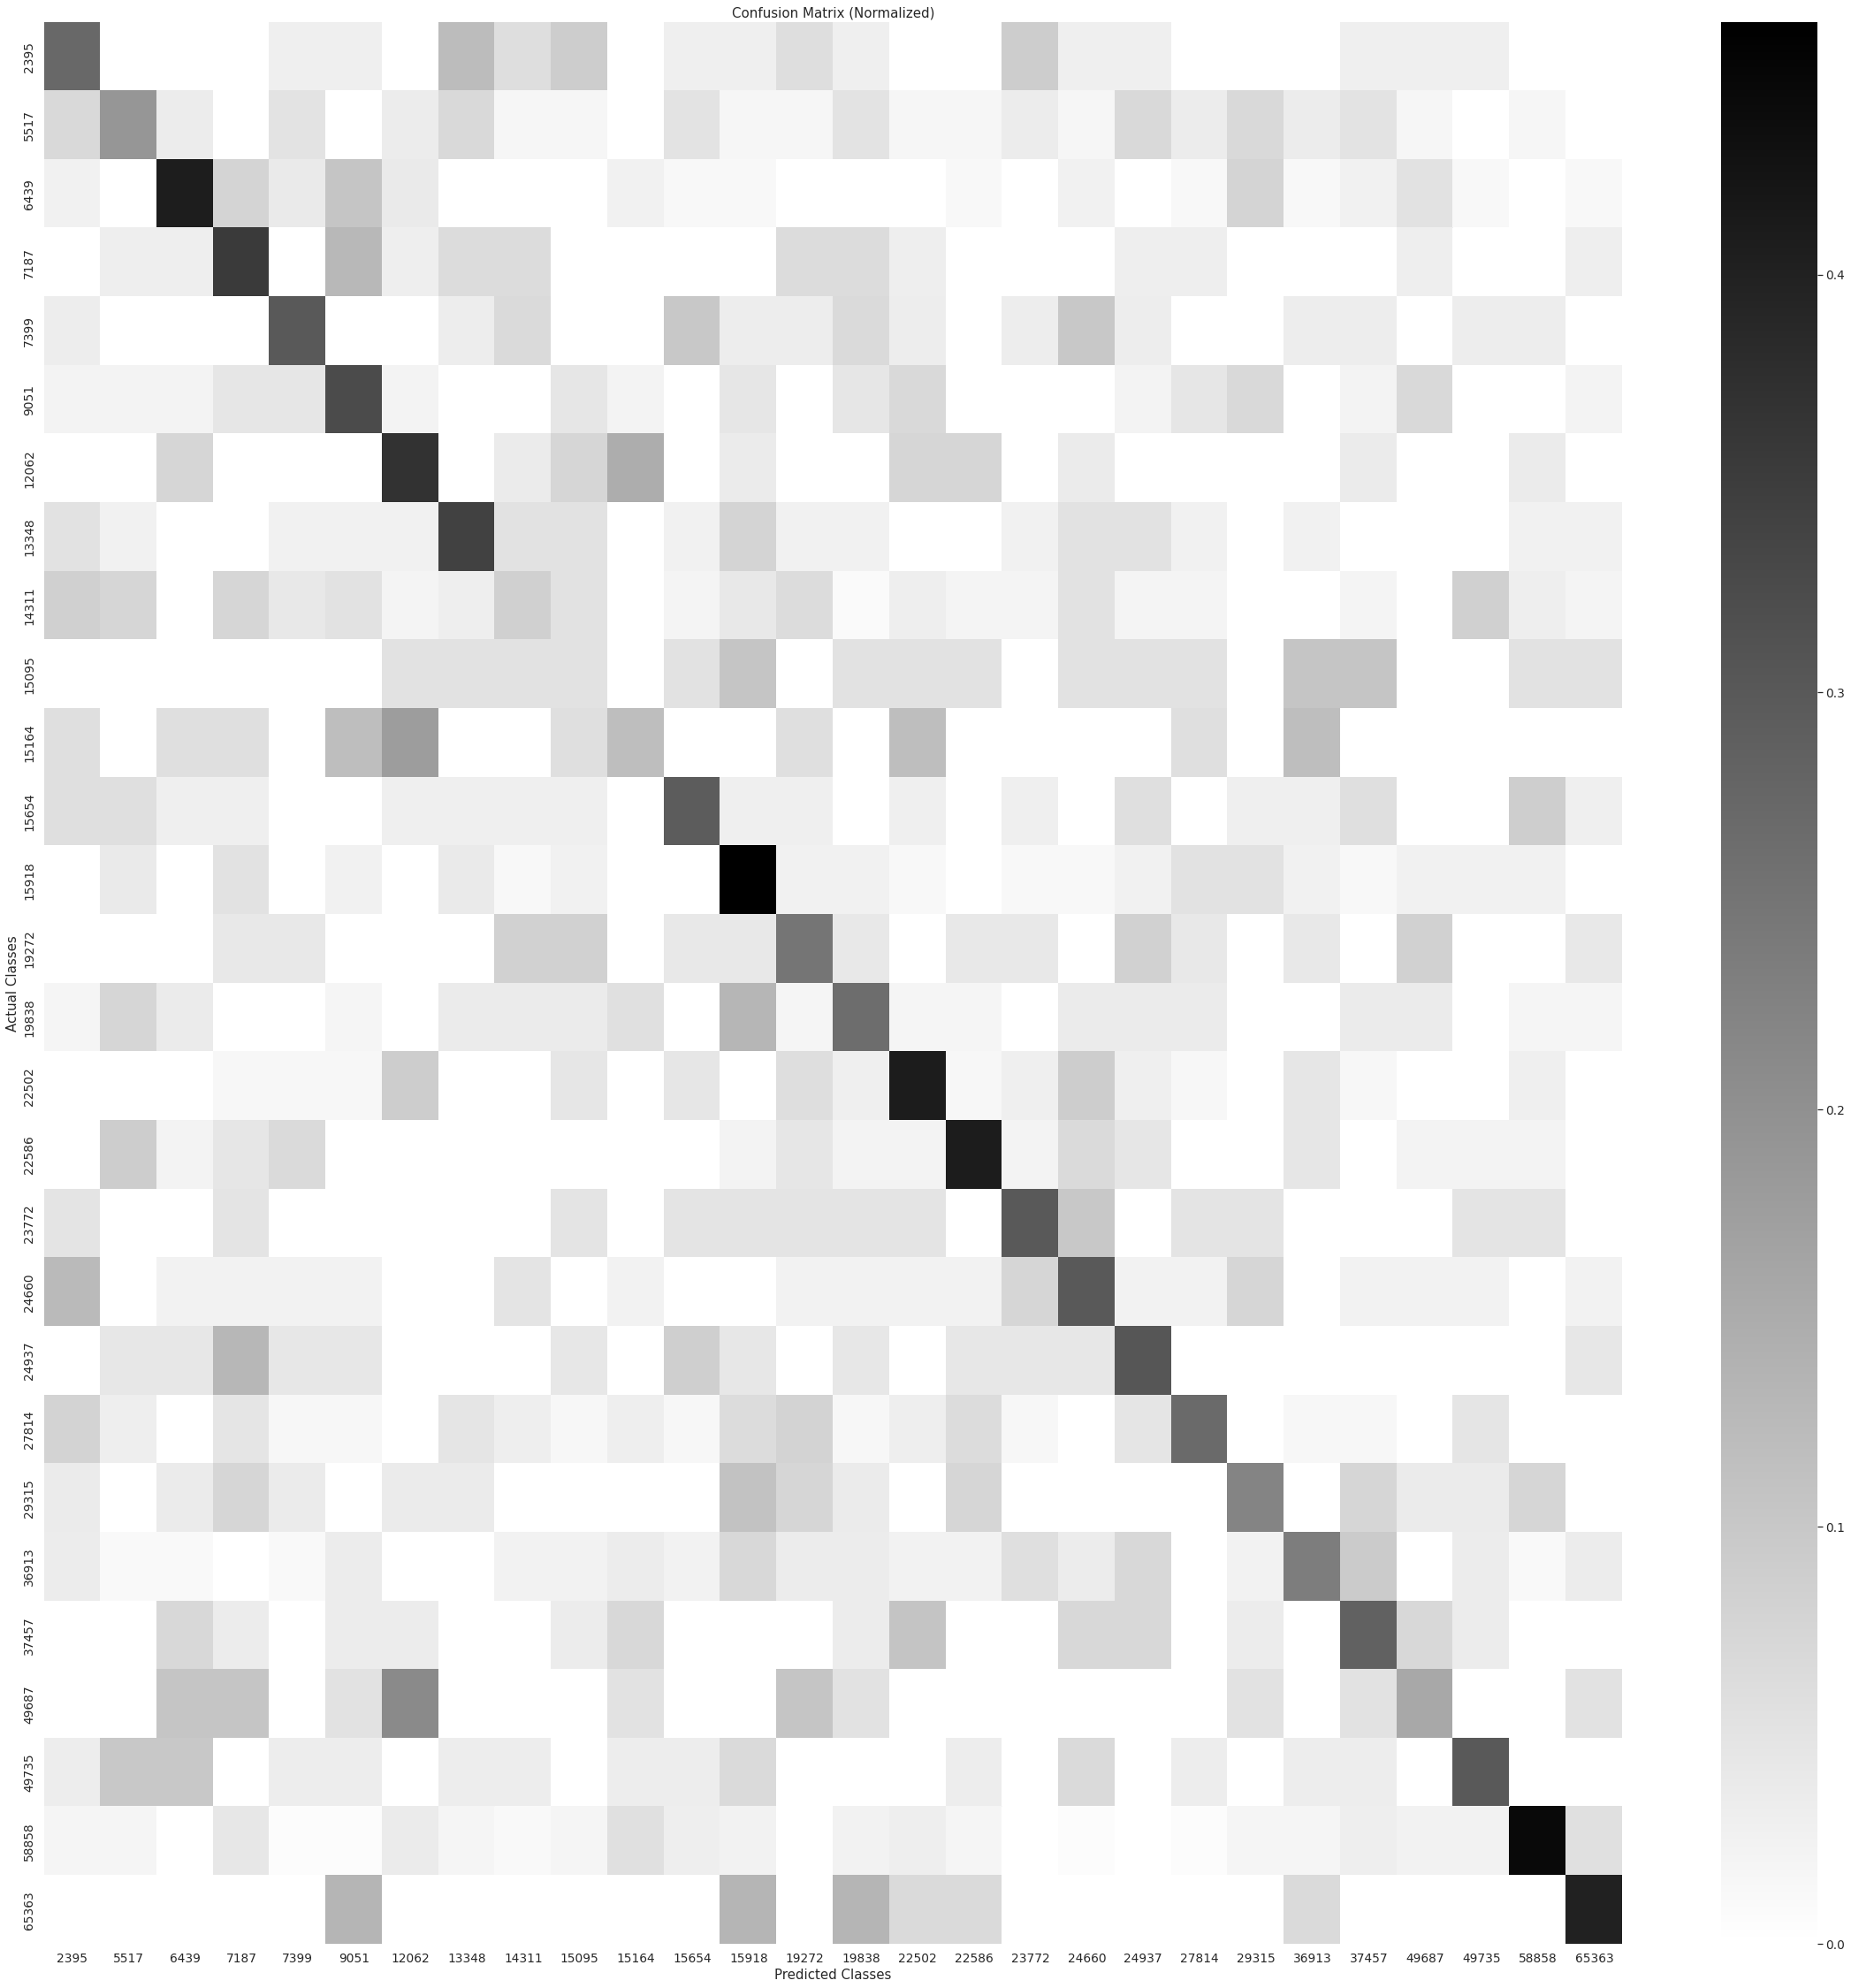

In [ ]:
sns.set(rc={'figure.figsize':(40, 40)})
sns.set(font_scale=1.25)
cm.plot(normalized=True, plot_lib = "seaborn")
